# Long Short Term Memory Model for Traffic Congestion Predictions

## 1- Loading & Exploring the Data

In [2]:
pwd

'/home/ebranson1/Predictive Analytics'

In [3]:
import pandas as pd
og_df = pd.read_csv('og_data.csv') 

print("First 5 rows of the DataFrame:")
print(og_df.head())

print("\nDataFrame Info:")
print(og_df.info())


First 5 rows of the DataFrame:
  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0     NaN  288.28      0.0      0.0          40       Clouds   
1     NaN  289.36      0.0      0.0          75       Clouds   
2     NaN  289.58      0.0      0.0          90       Clouds   
3     NaN  290.13      0.0      0.0          90       Clouds   
4     NaN  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -

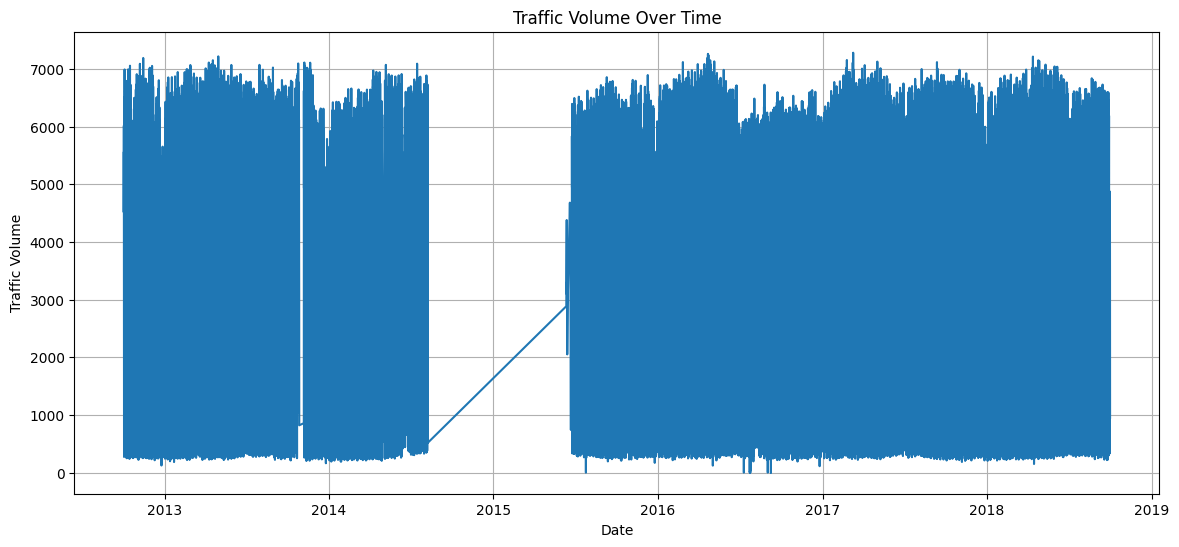

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

og_df['date_time'] = pd.to_datetime(og_df['date_time'])

plt.figure(figsize=(14, 6))
plt.plot(og_df['date_time'], og_df['traffic_volume'])
plt.title('Traffic Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.grid(True)
plt.show()

#### From this part I can see that there is a large gap in time for the year 2015. The team collectively decided to remove data prior to January 2016 in order to streamline the data and better evaluate our model's accuracy. The new data is visualized below.

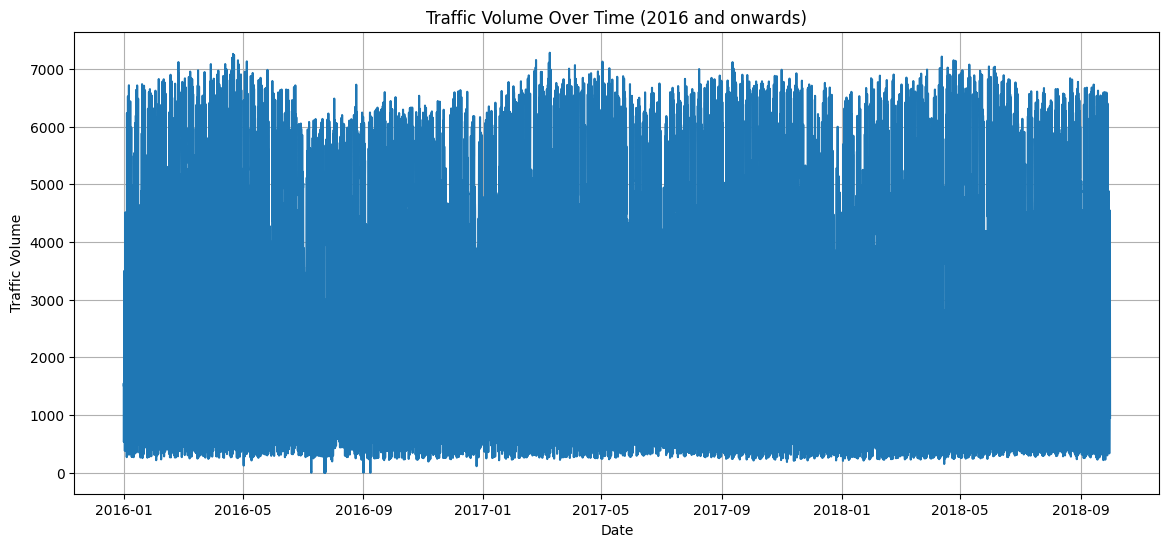

In [5]:
post16_df = og_df[og_df['date_time'].dt.year >= 2016]
plt.figure(figsize=(14, 6))
plt.plot(post16_df['date_time'], post16_df['traffic_volume'])
plt.title('Traffic Volume Over Time (2016 and onwards)')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.grid(True)
plt.show()

## Prepping the data for LSTM

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(post16_df['traffic_volume'].values.reshape(-1,1))


In [7]:
import numpy as np
def create_sequences(data, seq_length):
    xs = []
    ys = []

    for i in range(len(data)-seq_length-1):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)

    return np.array(xs), np.array(ys)

seq_length = 5  

X, y = create_sequences(scaled_data, seq_length)


#### For the model I decided to go with a 70/30 split of the data for training and testing. 

In [8]:
train_size = int(len(y) * 0.7) 
test_size = len(y) - train_size

X_train = X[:train_size]
y_train = y[:train_size]

X_test = X[train_size:]
y_test = y[train_size:]


In [9]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


### Building and Running the Model

#### For the parameters of the model, I used a batch size of 64 as well as 10 epochs as this is the generally accepted standard. I used the adam optimizer as well. This model has two layers with a dense layer included.

In [10]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=10, batch_size=64)

train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)
print(f'Train Loss: {train_loss}')
print(f'Test Loss: {test_loss}')

2024-04-15 11:30:23.907281: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-04-15 11:30:23.907312: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-04-15 11:30:29.975590: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-04-15 11:30:29.975628: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-04-15 11:30:29.975645: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (compute-11.insight.gsu.edu): /proc/driver/nvidia/version does not exist
2024-04-15 11:30:29.975845: I tensorflow/core/plat

Epoch 1/10
305/305 [==============================] - 5s 6ms/step - loss: 0.0387
Epoch 2/10
305/305 [==============================] - 2s 6ms/step - loss: 0.0106
Epoch 3/10
305/305 [==============================] - 2s 6ms/step - loss: 0.0084
Epoch 4/10
305/305 [==============================] - 2s 6ms/step - loss: 0.0080
Epoch 5/10
305/305 [==============================] - 2s 6ms/step - loss: 0.0078
Epoch 6/10
305/305 [==============================] - 2s 6ms/step - loss: 0.0076
Epoch 7/10
305/305 [==============================] - 2s 6ms/step - loss: 0.0075
Epoch 8/10
305/305 [==============================] - 2s 6ms/step - loss: 0.0074
Epoch 9/10
305/305 [==============================] - 2s 6ms/step - loss: 0.0073
Epoch 10/10
262/262 [==============================] - 0s 2ms/step - loss: 0.0055
Train Loss: 0.007168691139668226
Test Loss: 0.005539763253182173


#### Next I have created some visualizations to better understand the performance of the model and compare the evaluation metrics. 

Train Score: 616.38 RMSE
Test Score: 541.85 RMSE
Train Score: 427.48 MAE
Test Score: 392.45 MAE


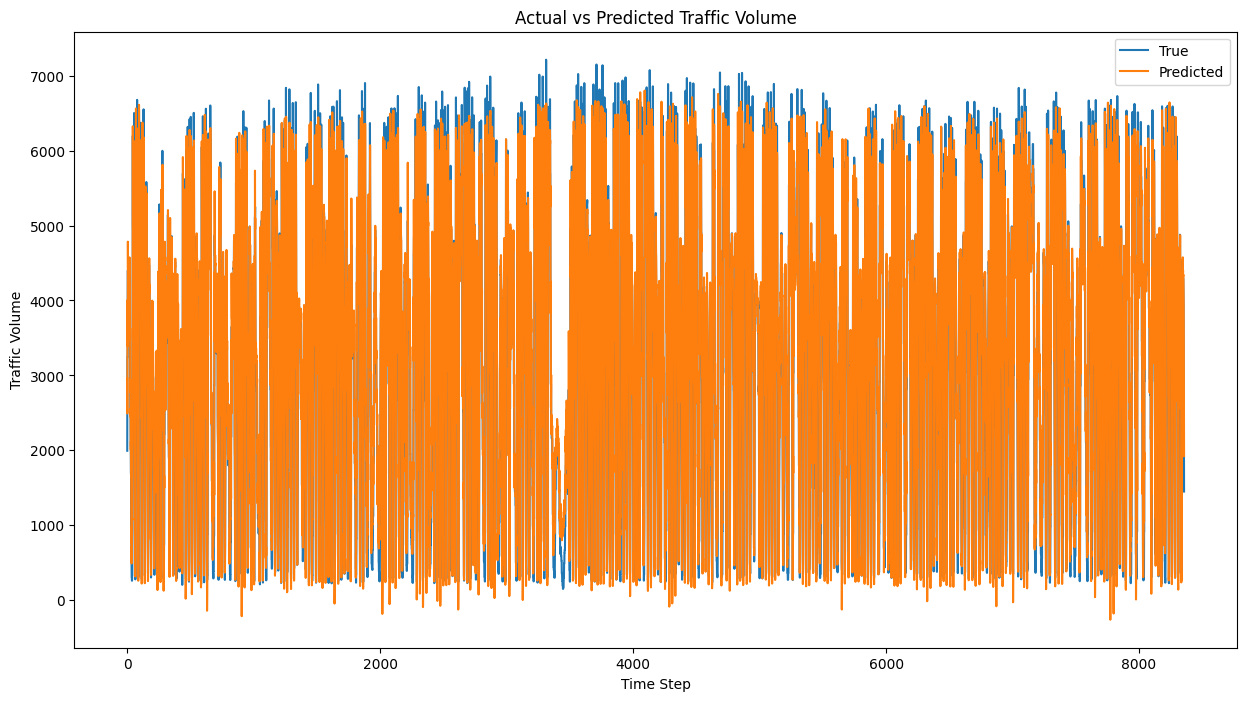

In [11]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
y_train_rescaled = scaler.inverse_transform(y_train).flatten() 
test_predict = scaler.inverse_transform(test_predict)
y_test_rescaled = scaler.inverse_transform(y_test).flatten()

trainScore = np.sqrt(mean_squared_error(y_train_rescaled, train_predict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test_rescaled, test_predict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

trainScore_MAE = mean_absolute_error(y_train_rescaled, train_predict[:,0])
print('Train Score: %.2f MAE' % (trainScore_MAE))
testScore_MAE = mean_absolute_error(y_test_rescaled, test_predict[:,0])
print('Test Score: %.2f MAE' % (testScore_MAE))


plt.figure(figsize=(15,8))
plt.plot(y_test_rescaled, label='True')
plt.plot(test_predict[:,0], label='Predicted')
plt.title('Actual vs Predicted Traffic Volume')
plt.xlabel('Time Step')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()


#### The visual indicates that overfitting is likely present which can be seen in the low training score RMSE of 618.85 and high test score RMSE of 3439.15. The overfitting could be a result of the chosen parameters and might be resolved with some more normalization or fine-tuning. Below is a visual of the training and testing data performance comparison.

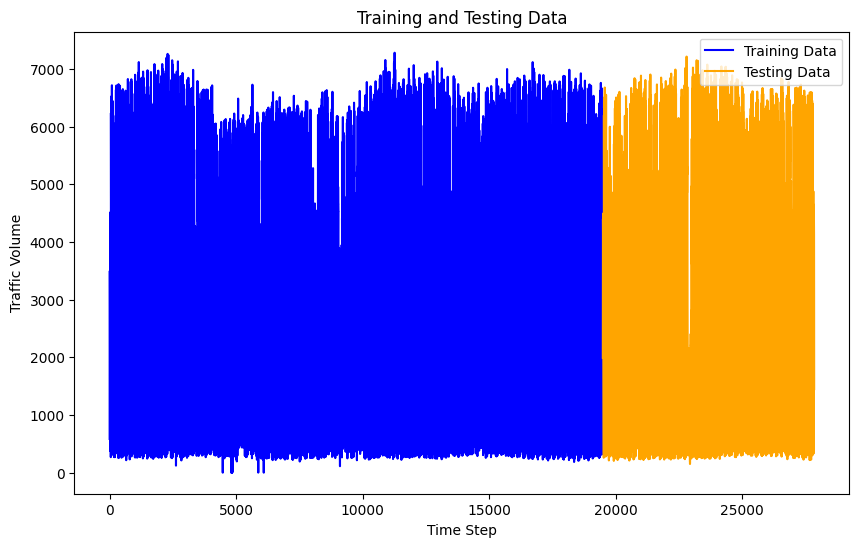

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_train_rescaled, label='Training Data', color='blue')
plt.plot(range(len(y_train_rescaled), len(y_train_rescaled) + len(y_test_rescaled)), y_test_rescaled, label='Testing Data', color='#FFA500')
plt.title('Training and Testing Data')
plt.xlabel('Time Step')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()


### Evaluation Metrics:

#### I also calculated the MSE metrics for the model in order to compare it to the other models in our project since AIC could not be calculated.

In [16]:
from sklearn.metrics import mean_squared_error

trainScore_MSE = mean_squared_error(y_train_rescaled, train_predict[:,0])
print('Train Score: %.2f MSE' % (trainScore_MSE))
testScore_MSE = mean_squared_error(y_test_rescaled, test_predict[:,0])
print('Test Score: %.2f MSE' % (testScore_MSE))


Train Score: 336458.41 MSE
Test Score: 246320.48 MSE


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

mae = mean_absolute_error(y_test, test_predict)
mse = mean_squared_error(y_test, test_predict)
rmse = sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


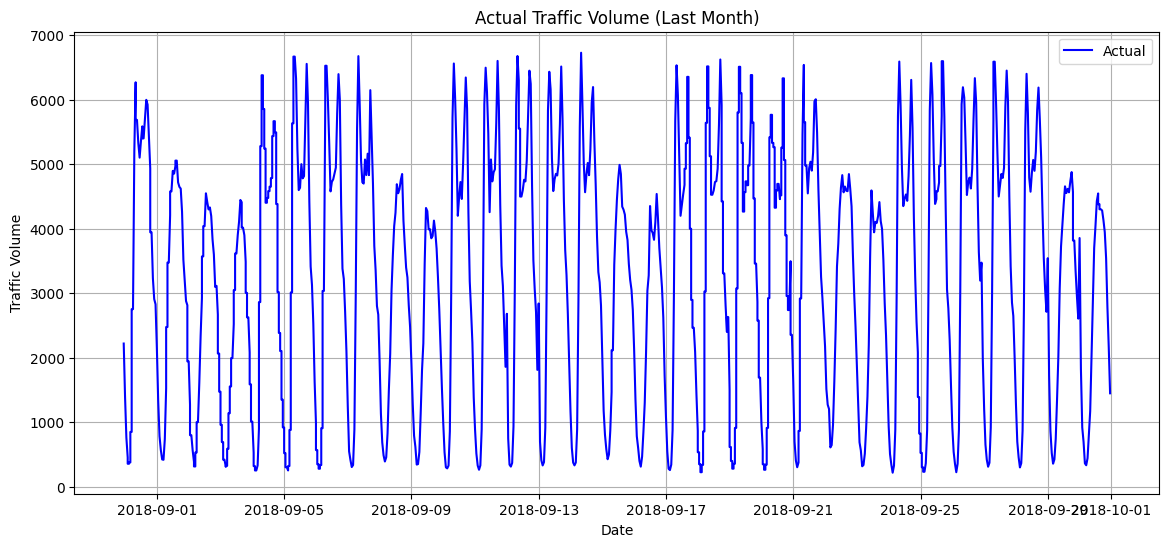

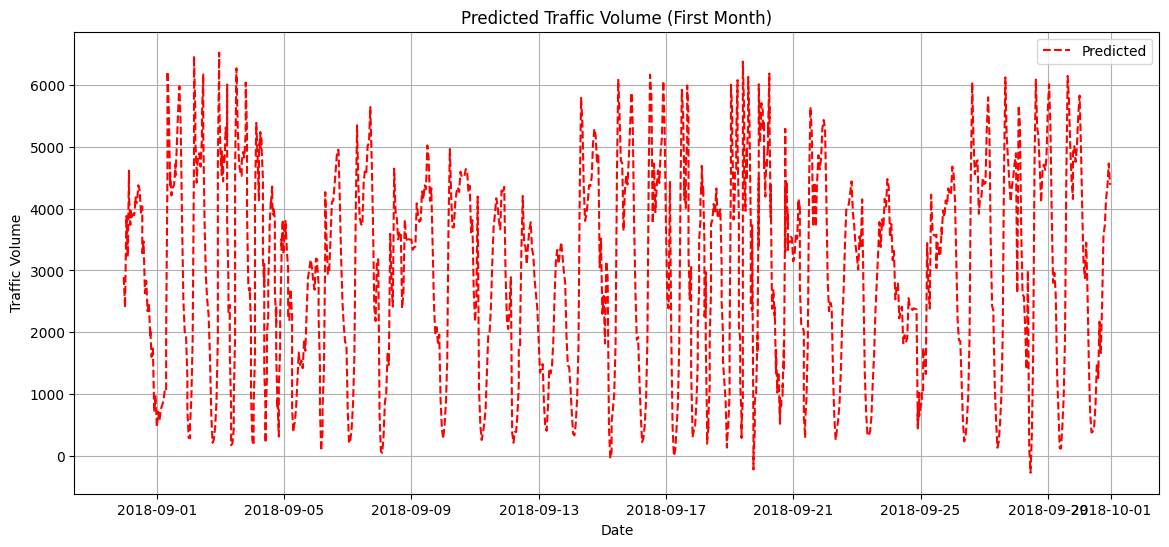

In [38]:
import matplotlib.pyplot as plt

last_month = post16_df['date_time'].max() - pd.DateOffset(months=1)
mask = post16_df['date_time'] >= last_month
post16_df_last_month = post16_df.loc[mask]

y_test_last_month = y_test_rescaled[-len(post16_df_last_month):]
test_predict_first_month = test_predict[:len(post16_df_last_month), 0]

plt.figure(figsize=(14, 6))
plt.plot(post16_df_last_month['date_time'], y_test_last_month, label='Actual', color='blue')

plt.title('Actual Traffic Volume (Last Month)')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(post16_df_last_month['date_time'], test_predict_first_month, label='Predicted', color='red', linestyle='dashed')

plt.title('Predicted Traffic Volume (First Month)')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.legend()
plt.grid(True)
plt.show()


### Results Summary:
#### In our analysis of traffic volume prediction using an LSTM model, we observed that the model was able to capture the general trend of the traffic volume over time. However, there were noticeable discrepancies between the actual and predicted values, especially during peak traffic times. We believe that while the model has learned to some extent from the training data and is able to generalize its learning to unseen data, other models might be better suited for a higher performance. 